In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path
from scipy.signal import find_peaks
import matplotlib

from utils.experiments import bool_filter_sine, bool_filter_triangular, get_waveform_est

plt.style.use("default")
plt.rcParams.update({
    #"text.usetex": False,
    #"font.family": "serif",
    #"font.serif": ["Helvetica"],
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,

})

DATA_SOURCE = Path.cwd().parent / '..' / 'data' / 'input' / 'raw'
PROC_SOURCE = DATA_SOURCE.parent/ "processed"


In [13]:
# ds = pd.read_pickle(PROC_SOURCE / "ten_materials.pkl.gz")
ds = pd.read_pickle(PROC_SOURCE / "N49.pkl.gz")
full_b, full_h = ds.loc[:, [f"B_t_{k}" for k in range(1024)]].to_numpy(), ds.loc[:, [f"H_t_{k}" for k in range(1024)]].to_numpy()

In [14]:

t = np.arange(1024)
template_lbls = ['other', 'square', 'triangular', 'sine']

ds["waveform"] = get_waveform_est(full_b)


no. of peaks = 2
triangular
0.0002771012799777811
no. of peaks = 4
other
8.749731132294708e-05
no. of peaks = 206
sine
2.341206552655419e-06
c:\Users\tpiepe\Repositories\hardcore-magnet-challenge\Model\..\notebooks\second_derivative.pdf


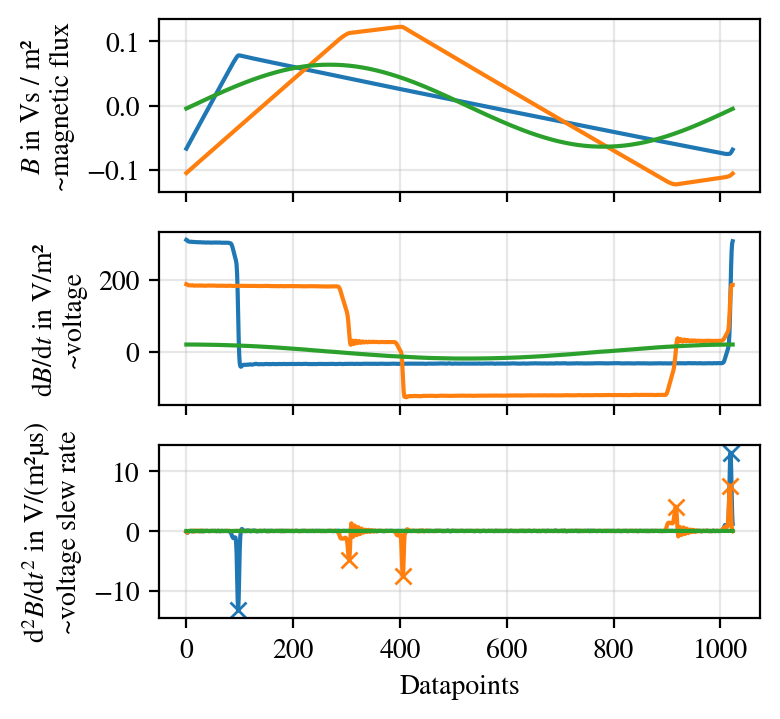

In [24]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 10})
# no = 10000 # vs. 10
# no = 1005
# no = 10
numbers = [105, 1000, 1] #[1000]#
fig, axes = plt.subplots(3, sharex=True, figsize=(4, 3.7))
color_tabs = ["tab:blue", "tab:orange", "tab:green" ]
for i, no in enumerate(numbers):
    # print(ds.loc[no])
    # plt.plot(full_h[no], full_b[no]) 

    # plt.plot(full_b[no])
    # plt.plot(full_h[no])
    b = full_b[no]
    db_dt = ds.loc[no]["freq"]*np.gradient(full_b[no])
    db_dt_dt = ds.loc[no]["freq"]**2*np.gradient(np.gradient(full_b[no]))

    axes[0].plot(b, color=color_tabs[i])
    axes[1].plot(db_dt, color=color_tabs[i], label=f"{template_lbls[int(ds.loc[no]['waveform'])]}")
    axes[2].plot(db_dt_dt/1e6, color=color_tabs[i])

    # axes[0].set_ylabel("~magnetic flux in Vs")
    axes[0].set_ylabel("$B$ in Vs / m²\n~magnetic flux")
    # axes[1].set_ylabel("~voltage in V")
    axes[1].set_ylabel("d$B$/d$t$ in V/m²\n~voltage")
    # axes[2].set_ylabel("~voltage slew rate in V/µs")
    axes[2].set_ylabel("$\mathrm{d}^2B$/d$t^2$ in V/(m²µs)\n~voltage slew rate", rotation=90)  # default 90
    axes[2].set_xlabel("Datapoints")


    rms = np.sqrt(np.mean(np.gradient(np.gradient(full_b[no]))**2))
    rmq = np.sqrt(np.mean(np.gradient(np.gradient(full_b[no]))**4))
    peak = max(np.gradient(np.gradient(full_b[no])))
    
    
    peaks, _ = find_peaks(np.abs(db_dt_dt)/np.max(db_dt_dt), height=0.2)
    if len(peaks) < 10:
        axes[2].plot(peaks, db_dt_dt[peaks]/1e6, "x", color=color_tabs[i])

    print(f"no. of peaks = {len(peaks)}")
    # print(f"intensity of peaks = {peaks}")
    print(template_lbls[int(ds.loc[no]["waveform"])])
    print(rmq/rms)
    
# axes[0].legend()
# axes[1].legend(loc="upper center")
# axes[2].legend()
plt.tight_layout()
# plt.savefig("C:/Users/tpiepe/Repositories/magnet-challenge-2023/notebooks/second_derivative.pdf")
plt.savefig(Path.cwd().parent / '../notebooks' / "second_derivative.pdf")
print(Path.cwd().parent / '../notebooks' / "second_derivative.pdf")
plt.show()

# detect change in time (absolute time as single switching instance (e.g. the GaN device turn on) is independend of switching frequency)
# classify the switching instance:
#   - from what voltage to what voltage?
#   - how fast?
#   - how many switching instances?
#   (- at which time?) - somehow encoded? maybe the CNN can use it to be "careful" at specific times

